# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Estacio, Damien Marius\
_Student No._: 202113663\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 20 Feb 2024 (3:30 pm)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Damien Marius Miana Estacio

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


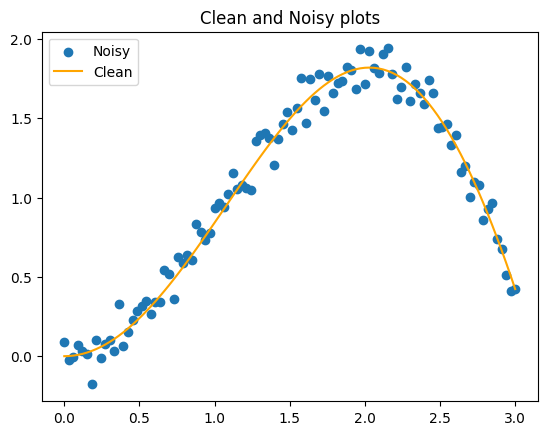

In [78]:
mean = 0
variance = 0.1
SD = variance**0.5
N = 100
# Initialize values and sample size

x = np.linspace(0, 3, N)
E = np.random.normal(mean, 0.1, N)
# Use 0.1 because actual SD is too noisy
y_clean = x*np.sin(x)
y_noisy = x*np.sin(x) + E
plt.scatter(x, y_noisy)
plt.plot(x, y_clean, color = "orange")
plt.legend(["Noisy", "Clean"], loc = "upper left")
plt.title("Clean and Noisy plots")
plt.show()
# Plot clean and noisy functions

The original function was plotted, and the noisy function was obtained with the given normal distribution.

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


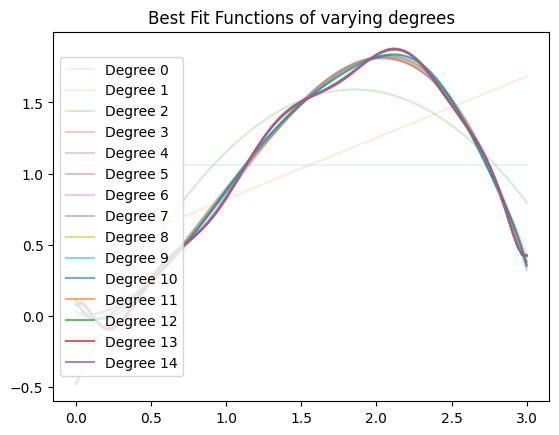

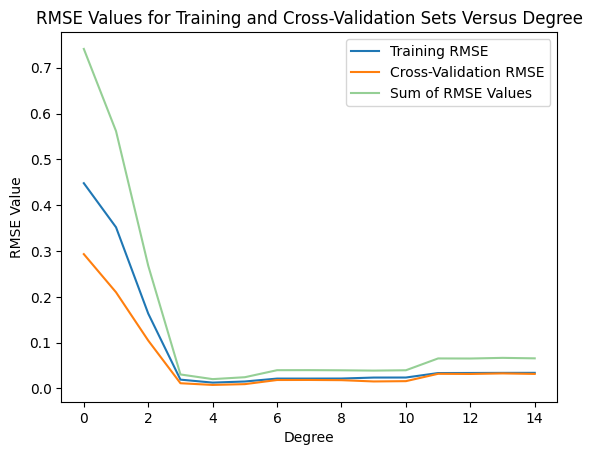

In [110]:
from sklearn.model_selection import train_test_split
# Import splitting function

x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, train_size = 0.5, test_size = 0.5
                                                    #, random_state = 42
                                                    )
x_test, x_cross, y_test, y_cross = train_test_split(x_test, y_test, train_size = 0.5, test_size = 0.5
                                                    #, random_state = 42
                                                    )
# Split data set into training, test, and cross-validation
# Random state was used to help with debugging
deg = np.arange(0, 15)
# Array for degrees
RMSE = np.zeros((2, 15))
# Initialize array to store RMSE values

for n in range(15):
  best_fit_coeff = np.polyfit(x_train, y_train, deg[n])
  # Function to get coefficients of best fit function from training set
  best_fit = np.poly1d(best_fit_coeff)
  # Function to get best fit function
  plt.plot(x, best_fit(x), label = "Degree " + str(n), alpha = 0.1 + 0.05*n)
  RMSE[0][n] = np.sum(((best_fit(x_train) - x_train*np.sin(x_train))**2)/N)
  RMSE[1][n] = np.sum(((best_fit(x_cross) - x_cross*np.sin(x_cross))**2)/N)
  # Getting RMSE values for training and cross-validation sets

plt.plot(x, y_clean, alpha = 0.2)
plt.title("Best Fit Functions of varying degrees")
plt.legend(loc = "center left")
plt.show()
print()
# Plotting best fit functions of varying degrees

RMSE_train = RMSE[0]**0.5
RMSE_cross = RMSE[1]**0.5
# Getting the actual RMSE values

plt.plot(RMSE_train)
plt.plot(RMSE_cross)
plt.plot(RMSE_train + RMSE_cross, alpha = 0.5)
plt.title("RMSE Values for Training and Cross-Validation Sets Versus Degree")
plt.xlabel("Degree")
plt.ylabel("RMSE Value")
plt.legend(["Training RMSE", "Cross-Validation RMSE", "Sum of RMSE Values"])
plt.show()
#Plotting the RMSE values for training and cross-validation sets and adding them to get the best fit function with the least error

The data set was split into the training, test, and cross-validation sets for obtaining the best fit function. The training set was used with the polyfit function and poly1d function to get a best fit function of a given degree. This function was then compared using both training and cross-validation sets to get the respective RMSE values. These values were plotted and summed. The least total RMSE value indicates the best fit function of given degree that has the least error when compared with training and cross-validation sets.